<h1>
<font color="#ff2e2e">
CamScanner
</font>
</h1>

In [11]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import copy

<h3><font color = "#079e05"> Utilities </font></h3>

In [12]:
def imshow(im):
    width, height, *channels = im.shape
    if channels:
        # By default, OpenCV tends to work with images in the BGR format.
        # This is due to some outdated practices, but it has been left in the library.
        # We can iterate the channels in reverse order to get an RGB image.
        plt.imshow(im[:,:,::-1])
    else:
        plt.imshow(im, cmap='gray')
    plt.axis('off')

In [13]:
def reorder(vertices):
    # OpenCV *prefers* if we use `np.float32`.
    reordered = np.zeros_like(vertices, dtype=np.float32)
    add = vertices.sum(1)
    reordered[0] = vertices[np.argmin(add)]
    reordered[2] = vertices[np.argmax(add)]
    diff = np.diff(vertices, axis=1)
    reordered[1] = vertices[np.argmin(diff)]
    reordered[3] = vertices[np.argmax(diff)]
    return reordered

<h3><font color = "#079e05"> Image </font></h3>

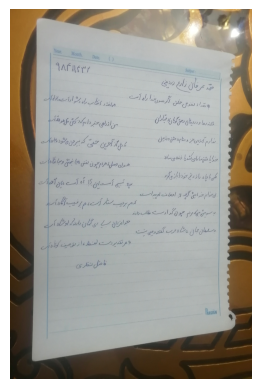

In [14]:
im = cv2.imread('images\Q4\pic.jpg')
imshow(im)

<h3><font color = "#079e05"> Process </font></h3>

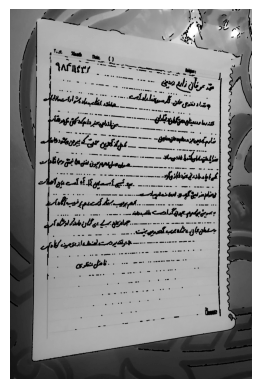

In [15]:
im = cv2.GaussianBlur(im,(5,5), 1)
g_img=cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
edge=cv2.Canny(g_img, 30, 80)
g_copy = g_img.copy()
contours, _ = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
mdist = 0
a,b,c,d =0,0,0,0
for i in contours:
    x,y,w,h = cv2.boundingRect(i)
    for j in contours:
        x1,y1,w1,h1= cv2.boundingRect(j)
        if math.dist([x,y],[x1,y1]) > mdist :
            mdist = math.dist([x,y],[x1,y1])
            a,b,c,d = x,y,x1,y1
cv2.drawContours(g_copy, contours, -1, (0, 255, 0), 10)
imshow(g_copy)

In [16]:
p_1 = np.float32([[c, d], [a,d],[c,b], [a,b]])
# defining the image corners:
p_2 = np.float32([[0, 0], [3600, 0],[0, 5000], [3600, 5000]])
# Apply Perspective Transform Algorithm
m = cv2.getPerspectiveTransform(p_1, p_2)
res = cv2.warpPerspective(g_copy, m, (3600, 5000))

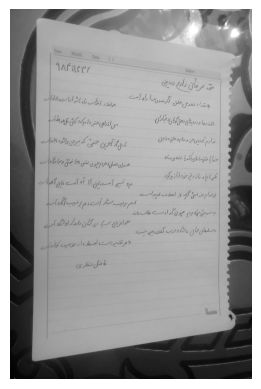

In [17]:
imshow(g_img)

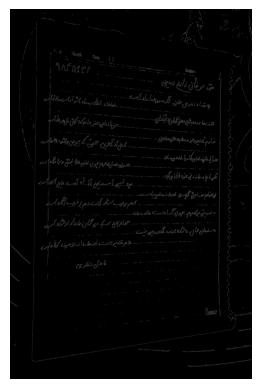

In [18]:
imshow(edge)

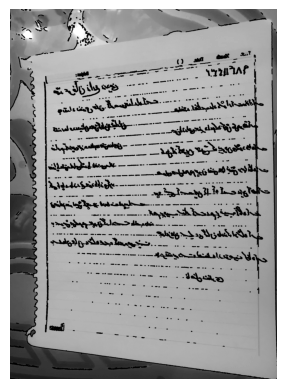

In [19]:
imshow(res)

In [20]:
def enhance(im):
    im_HSV = cv2.cvtColor(im, cv2.COLOR_BGR2HSV).astype("float32")
    
    h, s, v = cv2.split(im_HSV)
    s = np.clip(s * 3, 0, 255)
    
    im_RGB = cv2.cvtColor(cv2.merge([h, s, v]).astype("uint8"), cv2.COLOR_HSV2BGR)
    return im_RGB

In [21]:
nimg=enhance(res)

error: OpenCV(4.7.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x416a7d27::Set<3,-1,-1>,struct cv::impl::A0x416a7d27::Set<0,5,-1>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1
